In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
sns.set()

In [2]:
%matplotlib inline

In [3]:
def flatten(container):
    "Flattens lists"
    for i in container:
        if isinstance(i, (list, tuple)):
            for j in flatten(i):
                yield j
        else:
            yield i

def feature_list(no_of_neighbors):
    """
    Creates a list of features given number of adjacent wells
    param no_of_neighbors: number of adjacent wells used in feature engineering
    """
    print("Getting the features")
    initial = ["thickness", "thickness natural log", "thickness power"]
    features = []
    for item in initial:
        features.append(item)
        for i in range(1, no_of_neighbors + 1):
            features.append(item + " neighbor " + str(i))
    features.append(["x location", "y location", "class"])
    return list(flatten(features))

In [4]:
TRAINING_DATA = pd.read_csv(r'399neighbors.csv', index_col=[0])

In [15]:
ACCURACY_MEASURED = []  # for the cross-validation accuracy
VICINITY = []  # the number of adjacent wells
grid_params = {
    'bootstrap': [True, False],
    'max_depth': [1, 10, 100],
    'max_features': [1, 100, 500],
    'min_samples_leaf': [10, 100, 1000],
    'min_samples_split': [10, 100, 1000],
    'n_estimators': [10, 100, 1000],
    'criterion': ['gini', 'entropy']
}


for i in range(400):
    print(f'{i} number of wells in vicinity')
    wells_in_vicinity = i
    flat_features = feature_list(wells_in_vicinity)
    subset = TRAINING_DATA[flat_features]
    X_train, X_test, y_train, y_test = train_test_split(
        subset.drop("class", axis=1), subset["class"], test_size=0.2, random_state=86,
    )
    gs = GridSearchCV(RandomForestClassifier(), grid_params, verbose=8, cv=5, n_jobs=7)
    gs_results = gs.fit(X_train, y_train)
    rtclf = RandomForestClassifier(**gs.best_params_)

    cved = cross_val_score(
        rtclf,
        #dataset.drop("class", axis=1),
        #dataset["class"],
        X_test,
        y_test,
        cv=5,
        scoring="accuracy",
    )
    ACCURACY_MEASURED.append(cved)
    VICINITY.append(wells_in_vicinity)

0 number of wells in vicinity
Getting the features
Fitting 5 folds for each of 972 candidates, totalling 4860 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done  40 tasks      | elapsed:    5.9s
[Parallel(n_jobs=7)]: Done  79 tasks      | elapsed:   16.4s
[Parallel(n_jobs=7)]: Done 120 tasks      | elapsed:   26.3s
[Parallel(n_jobs=7)]: Done 169 tasks      | elapsed:   33.4s
[Parallel(n_jobs=7)]: Done 228 tasks      | elapsed:   37.0s
[Parallel(n_jobs=7)]: Done 295 tasks      | elapsed:   41.2s
[Parallel(n_jobs=7)]: Done 372 tasks      | elapsed:   45.6s
[Parallel(n_jobs=7)]: Done 457 tasks      | elapsed:  1.1min
[Parallel(n_jobs=7)]: Done 552 tasks      | elapsed:  1.7min
[Parallel(n_jobs=7)]: Done 655 tasks      | elapsed:  1.8min
[Parallel(n_jobs=7)]: Done 768 tasks      | elapsed:  1.9min
[Parallel(n_jobs=7)]: Done 889 tasks      | elapsed:  2.5min
[Parallel(n_jobs=7)]: Done 1020 tasks      | elapsed:  3.0min
[Parallel(n_jobs=7)]: Done 1159 tasks      | elapsed:  3.2min
[Paralle

1 number of wells in vicinity
Getting the features
Fitting 5 folds for each of 972 candidates, totalling 4860 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done  40 tasks      | elapsed:    6.1s
[Parallel(n_jobs=7)]: Done  79 tasks      | elapsed:   16.9s
[Parallel(n_jobs=7)]: Done 120 tasks      | elapsed:   28.9s
[Parallel(n_jobs=7)]: Done 169 tasks      | elapsed:   37.0s
[Parallel(n_jobs=7)]: Done 228 tasks      | elapsed:   41.0s
[Parallel(n_jobs=7)]: Done 295 tasks      | elapsed:   44.8s
[Parallel(n_jobs=7)]: Done 372 tasks      | elapsed:   49.3s
[Parallel(n_jobs=7)]: Done 457 tasks      | elapsed:  1.2min
[Parallel(n_jobs=7)]: Done 552 tasks      | elapsed:  1.8min
[Parallel(n_jobs=7)]: Done 655 tasks      | elapsed:  2.0min
[Parallel(n_jobs=7)]: Done 768 tasks      | elapsed:  2.1min
[Parallel(n_jobs=7)]: Done 889 tasks      | elapsed:  2.7min
[Parallel(n_jobs=7)]: Done 1020 tasks      | elapsed:  3.1min
[Parallel(n_jobs=7)]: Done 1159 tasks      | elapsed:  3.2min
[Paralle

Text(0, 0.5, 'Accuracy')

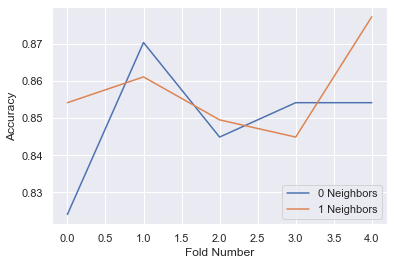

In [16]:
MEAN_ACCURACY = []
for i in enumerate(ACCURACY_MEASURED):
    plt.plot(ACCURACY_MEASURED[i[0]], label=str(VICINITY[i[0]]) + " Neighbors")
    MEAN_ACCURACY.append(ACCURACY_MEASURED[i[0]].mean().round(4))
    plt.legend()
plt.xlabel("Fold Number")
plt.ylabel("Accuracy")

Text(0, 0.5, 'mean cross-validated accuracy')

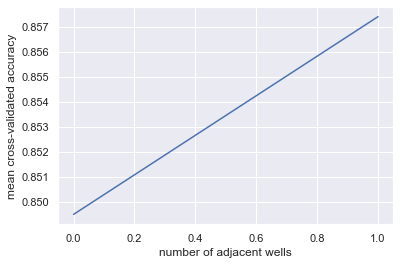

In [17]:
plt.plot(VICINITY, MEAN_ACCURACY)
plt.xlabel("number of adjacent wells")
plt.ylabel("mean cross-validated accuracy")

In [13]:
rtclf

RandomForestClassifier(criterion='entropy', max_depth=100, max_features=1,
                       min_samples_split=10, n_estimators=1000)